# **Classifieur SVM**

Dans cette prmière approche nous allons résoudre le problème de reconnaissance de caractère à l'aide d'un classifieur SVM.
Cette approche est constituée de plusieurs étapes:
* **Réduction de dimension par Analyse en Composante Principale (ACP):** L'ACP consiste à projeter les données sur un nombre d'axe choisi en maximisant les variances obtenues sur chaque dimension. Cela permet de conserver un maximum d'information.

* **Création du classifieur SVM:** Permet de classifier nos différentes images.

### **ACP**

Nous allons maintenant présenter les résultats de l'ACP pour différentes valeurs du nombre de composants en classifiant les données obtenues par un SVM simple(C=1.0, kernel linear). Cela nous permettra de choisir sur combien de composants projeter notre image.

Accuracy: [0.78000000000000003, 0.87, 0.89666666666666661, 0.90666666666666662, 0.90666666666666662, 0.89666666666666661, 0.90333333333333332, 0.89666666666666661, 0.90000000000000002, 0.90333333333333332, 0.90333333333333332, 0.90333333333333332, 0.90333333333333332, 0.90333333333333332]


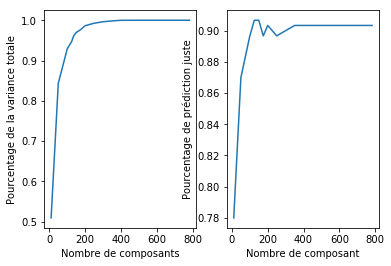

1

In [14]:
# Librairies
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from skimage.feature import hog
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

seed = 7
np.random.seed(seed)

# Importer la base de donnée
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float')
X_test = X_test.astype('float')
X_train = X_train.reshape((len(X_train), 28*28))
X_test = X_test.reshape((len(X_test), 28*28))


# Réduction par ACP


def plot_ACP(x_train, x_test, y_train, y_test):
    """
    Trace le pourcentage de la variance totale projetée sur n composantsen fonction du nombre de composant
    """
    ratio_var = []
    acc_pca=[]
    clf = svm.SVC(kernel='linear', C=1.0, class_weight='balanced')
    for i in [10, 50, 100, 125, 150, 175, 200, 250, 300, 350, 400, 500, 600, 783]:
        x_train_pca = x_train
        x_test_pca = x_test
        pca = PCA(n_components=i)
        pca.fit(x_train_pca)
        x_train_pca = pca.transform(x_train_pca)
        ratio_var.append(sum(pca.explained_variance_ratio_)) # sum variance of each component
    
        clf.fit(x_train_pca, y_train)
        x_test_pca = pca.transform(x_test_pca)
        pred = clf.predict(x_test_pca)
        acc = accuracy_score(pred, y_test)
        acc_pca.append(acc)
    
    plt.subplot(1, 2, 1)
    plt.plot([10, 50, 100, 125, 135, 150, 175, 200, 250, 300, 350, 400, 500, 783], ratio_var)
    plt.xlabel("Nombre de composants")
    plt.ylabel("Pourcentage de la variance totale")
    plt.subplot(1, 2, 2)
    plt.plot([10, 50, 100, 125, 150, 175, 200, 250, 300, 350, 400, 500, 600, 783], acc_pca)
    plt.xlabel("Nombre de composant")
    plt.ylabel("Pourcentage de prédiction juste")
    print("Accuracy:", acc_pca)
    plt.show()
    return 1

# Nous appliquons la fonction à un nombre plus réduit d'image afin de racourcir le temps d'exécution.
plot_ACP(X_train[0:1000], X_test[0:300], y_train[0:1000], y_test[0:300])

On observe qu'autour de 130 composants on obtient un maximum de pourcentage de prédiction juste avec un SVM linéaire. On choisira donc donc pour la suite cette valeur de nombre de composant.

### **Optimisation des paramètres SVM**

Nous allons maintenant chercher à optimiser les différents paramètres de notrs SVM afin d'optenir les meilleures performances possibles.

In [15]:
# Réduction par ACP
from sklearn.model_selection import GridSearchCV
n_components = 130
pca = PCA(n_components=n_components)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

C = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

parameters = {'kernel': kernel, 'C': C} 
svm_clsf = svm.SVC()
grid_clsf = GridSearchCV(estimator=svm_clsf, param_grid=parameters, n_jobs=1, verbose=0)

grid_clsf.fit(X_train[0:10000], y_train[0:10000])

classifier = grid_clsf.best_estimator_
params = grid_clsf.best_params_

pred = grid_clsf.predict(X_test)
acc = accuracy_score(pred, y_test)

print("Meilleurs paramètres:", params)
print("Accuracy:", acc)

Meilleurs paramètres: {'kernel': 'poly', 'C': 0.01}
Accuracy: 0.9704


Les paramètres permettant d'obtenir les meilleurs résultats sont: kernel='poly' et C=0.01. Pour des raisons de vitesse d'éxecution nous effectué l'apprentissage avec 10000 images. Nous allons maintenant tester les résultats sur la totalité de la base de donnée.

In [16]:
svm = svm.SVC(C=0.01, kernel='poly')
svm.fit(X_train, y_train)
pred = svm.predict(X_test) 
acc = accuracy_score(pred, y_test)

print("Accuracy:", acc)

Accuracy: 0.9841


### **Résultats**

On obtient donc finalement un taux de prédiction juste de 98,41% ce qui est un bon résultat.